In [2]:
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
#load 'tips' dataset
tips = sns.load_dataset('tips')

In [5]:
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
#distribution plot of one variable

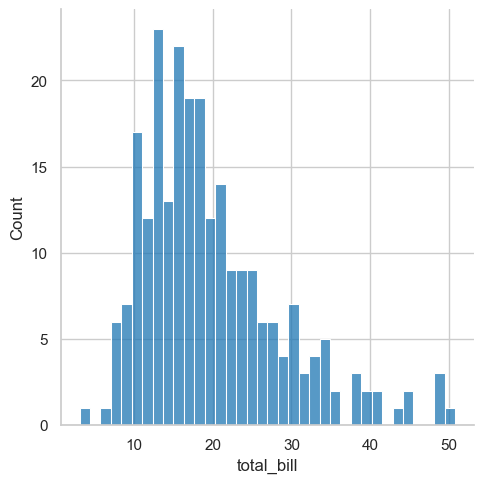

In [132]:
#.displot is new version of .distplot
#kde is kernel density estimation. will not show unless kde=True. False by default now
#bins argument to control # of bins
sns.displot(tips['total_bill'],bins=36)

In [13]:
#joint plot - can combine two distribution plots
#two variables

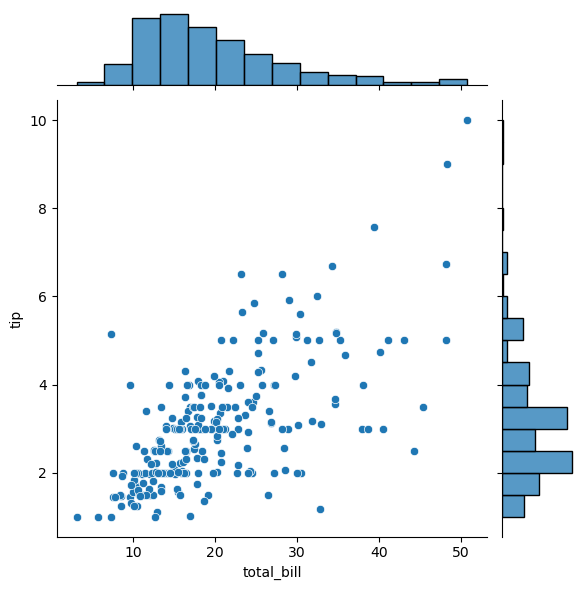

In [18]:
#kind parameter - affects inner graph - e.g. scatterplot in this example
#scatter plot is the default kind
#changing kind to kind='hex' to change it into a hexagon distribution representation
#reg = regression
#kde - kernel density estimation

sns.jointplot(x='total_bill',y='tip',data=tips)

In [19]:
#pair plot
#plot pairwise relationships across an entire data frame (for numerical columns)
#supports color hue argument for categorical columns

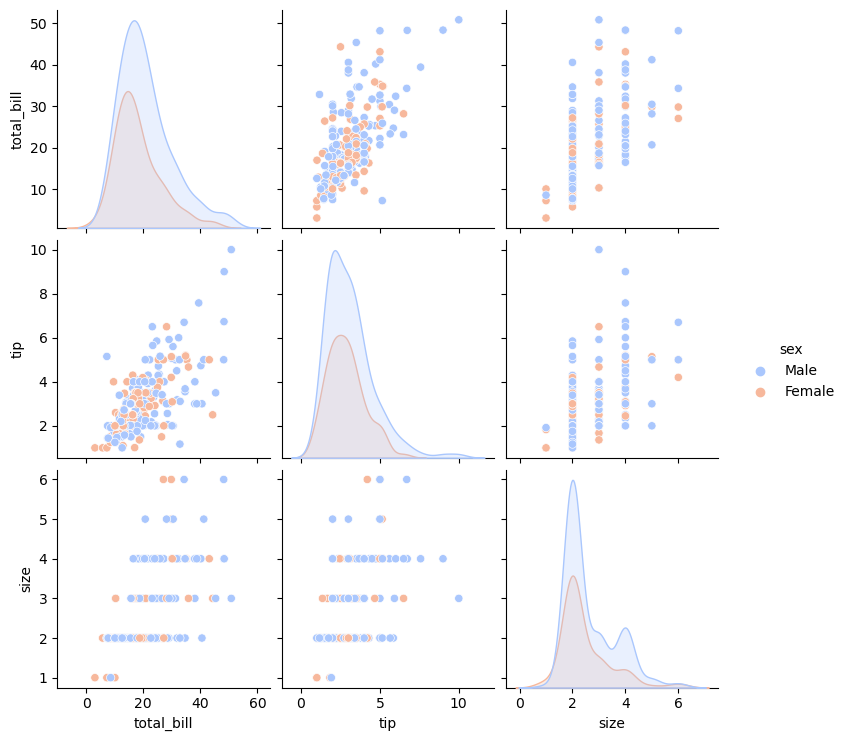

In [23]:
#may take a long time if dataset is big
#hue takes in categorial variables
#palette controls the color palette/theme of graphs

sns.pairplot(tips,hue='sex',palette='coolwarm')

In [24]:
#Rug Plot
#takes single column
#draws a dash mark for every point in the univariate distribution line

<AxesSubplot:xlabel='total_bill'>

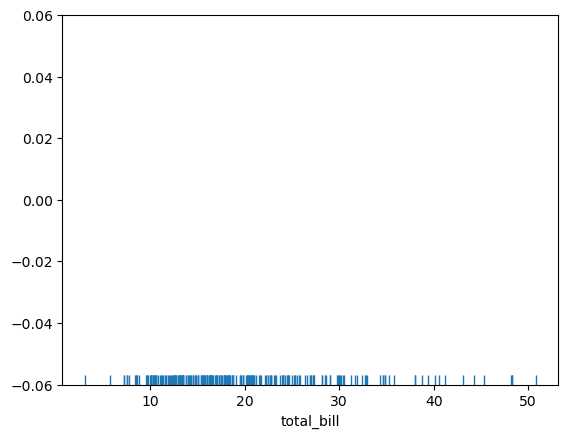

In [25]:
sns.rugplot(tips['total_bill'])

In [26]:
#KDE Plots
#kernel density estimation
#copy paste code in for diagram

(0.0, 1.0)

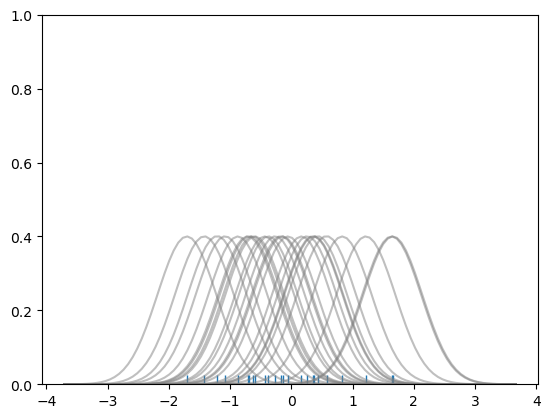

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#will create normal distribution lines for every data point 

# Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up x-axis
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2

#Create an empty kernel list
kernel_list = []

#Plot each basis function
for data_point in dataset:
    
    #Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color='grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

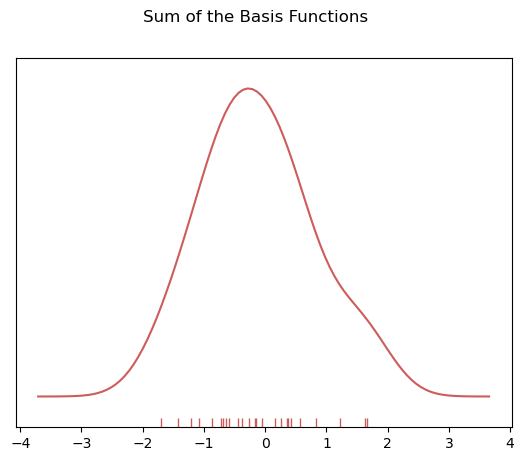

In [28]:
# sum of graph above to get kde plot

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

#Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c='indianred')

#Get rid of y-tick marks
plt.yticks([])

#Set title
plt.suptitle("Sum of the Basis Functions")

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

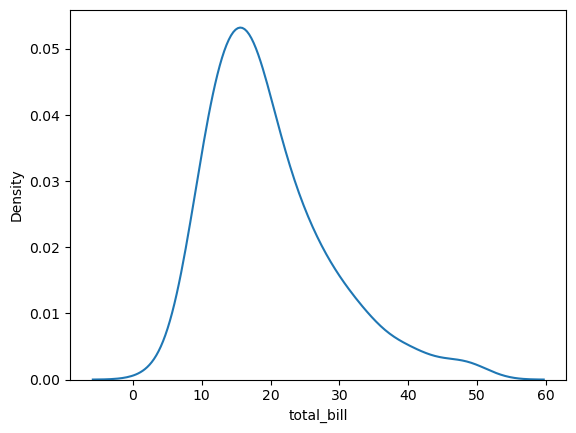

In [29]:
#kde plot without histogram
sns.kdeplot(tips['total_bill'])

In [31]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='sex', ylabel='total_bill'>

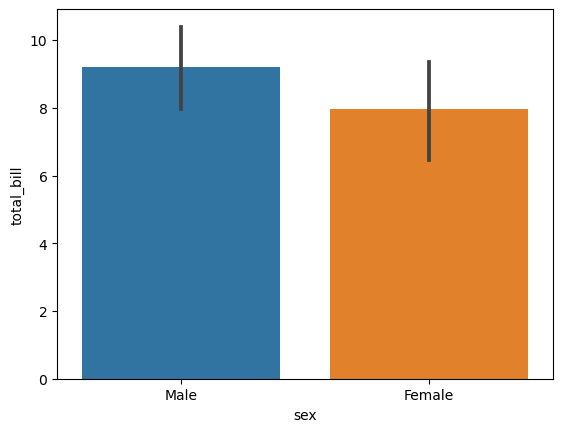

In [34]:
#Bar plot
#estimator affects aggregate function

sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)

<AxesSubplot:xlabel='sex', ylabel='count'>

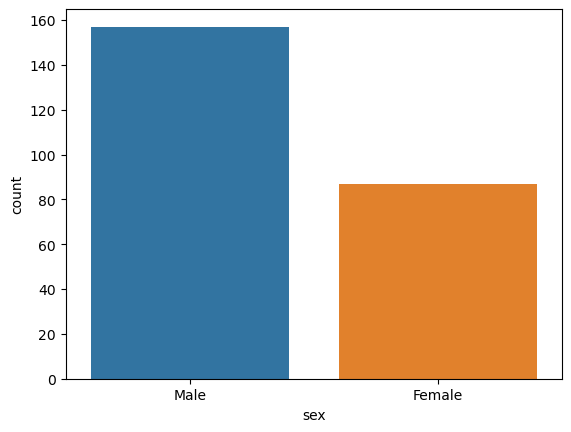

In [35]:
#Count Plot - counts number of occurrences

sns.countplot(x='sex',data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

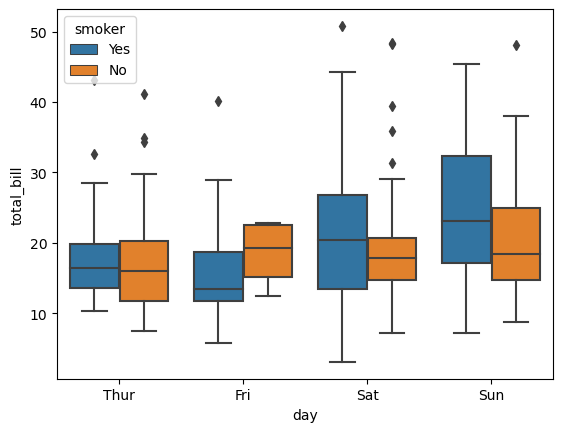

In [37]:
#Boxplot
#can add hue - another layer of data

sns.boxplot(x='day',y='total_bill',data=tips,hue='smoker')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

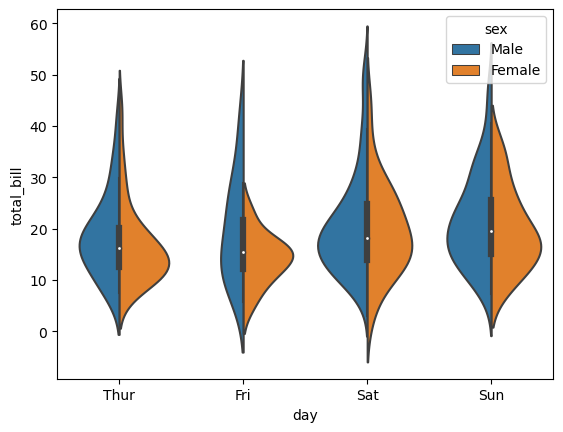

In [45]:
#Violin Plot
#can also take hue argument
#can also take split argument along with hue argument to split violins down the middle instead of having two violins sidebyside

sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',split=True)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

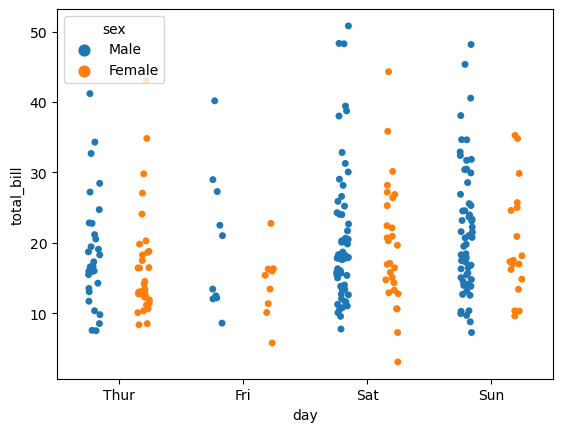

In [44]:
#Strip Plot
#scatterplot where one variable is categorical
#jitter argument helps separate points that are stacked on each other

sns.stripplot(x='day',y='total_bill',data=tips,jitter=True,hue='sex',dodge=True)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

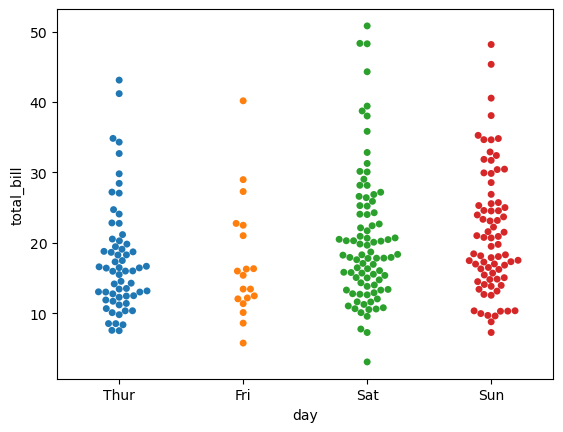

In [46]:
#Swarm Plot
#sort of a combo of strip and violin plots
#don't scale well to large datasets

sns.swarmplot(x='day',y='total_bill',data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

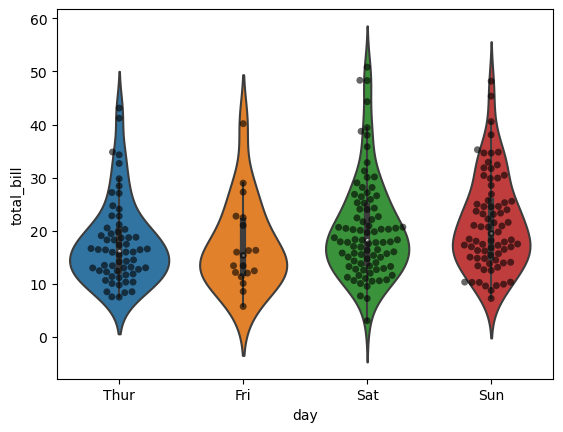

In [48]:
# stacked swarm and violin plot
sns.violinplot(x='day',y='total_bill',data=tips)
sns.swarmplot(x='day',y='total_bill',data=tips,color='black',alpha=.6)

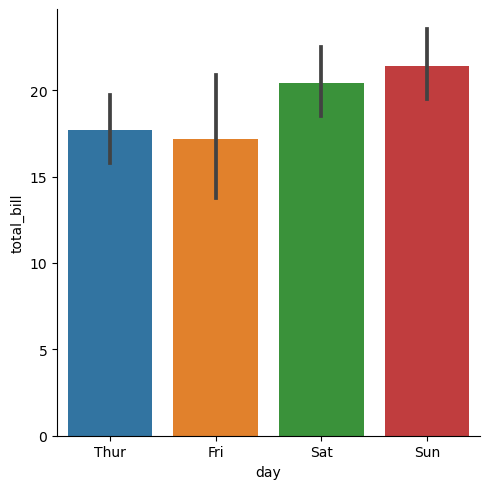

In [53]:
#Factor Plot
#most general
#renamed to catplot

sns.catplot(x='day',y='total_bill',data=tips,kind='bar')

In [55]:
#load tips dataframe in code above

flights = sns.load_dataset('flights')

In [56]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [57]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [58]:
# Heat Maps
#data should already be in a matrix form - need to have variables in columns and rows

In [60]:
#correlation data method to create a matrix
tc = tips.corr()

<AxesSubplot:>

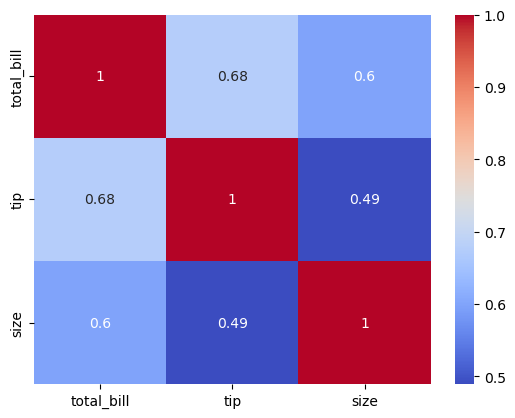

In [63]:
sns.heatmap(tc,annot=True,cmap='coolwarm')

In [66]:
#pivot table method of creating a matrix out of a dataset

fp = flights.pivot_table(index='month',columns='year',values='passengers')

<AxesSubplot:xlabel='year', ylabel='month'>

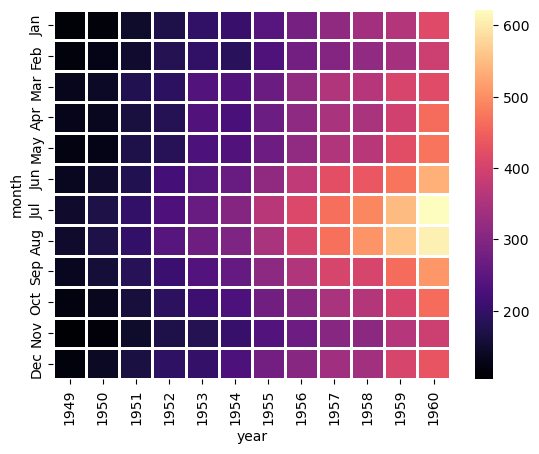

In [70]:
sns.heatmap(fp,cmap='magma',linecolor='white',linewidths=1)

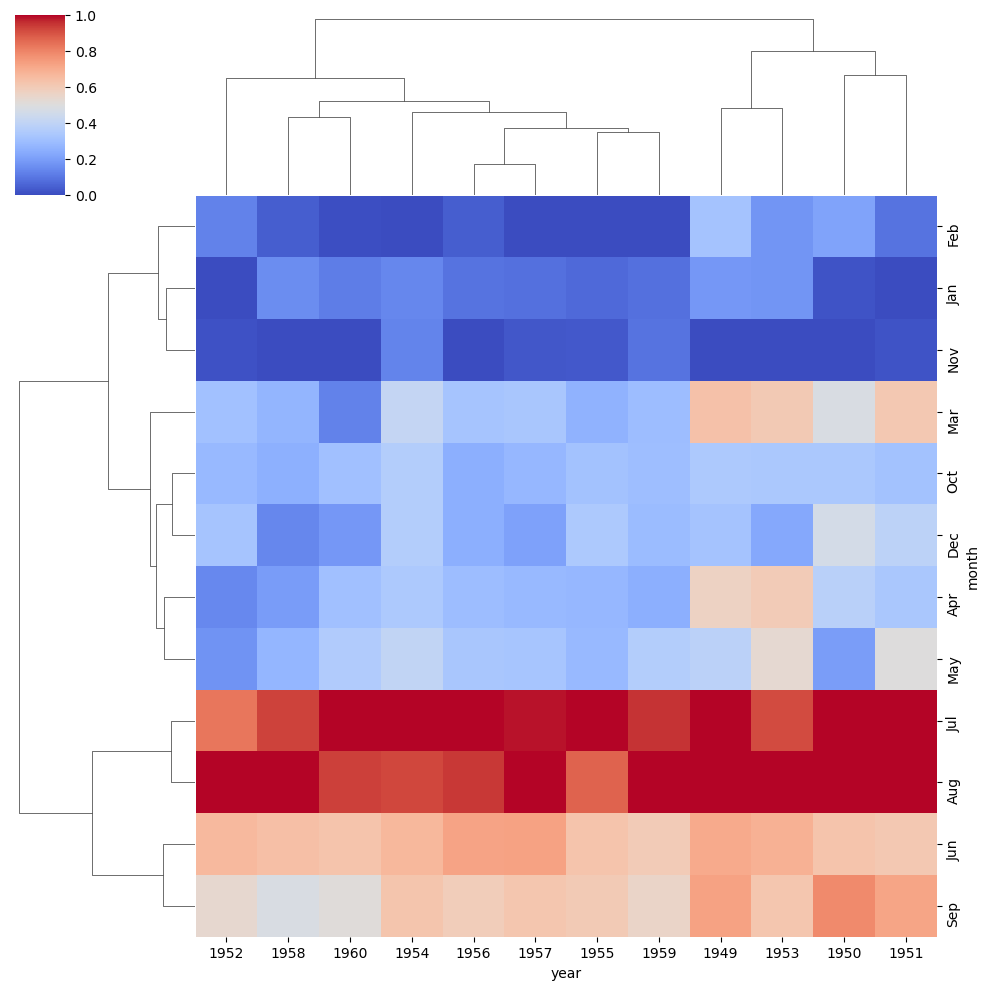

In [73]:
#Cluster map
#uses hierarchical clustering to create a clustered version of a heat map
#puts similar groups closer to each other

sns.clustermap(fp,cmap='coolwarm',standard_scale=1)

In [75]:
iris = sns.load_dataset('iris')

In [76]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


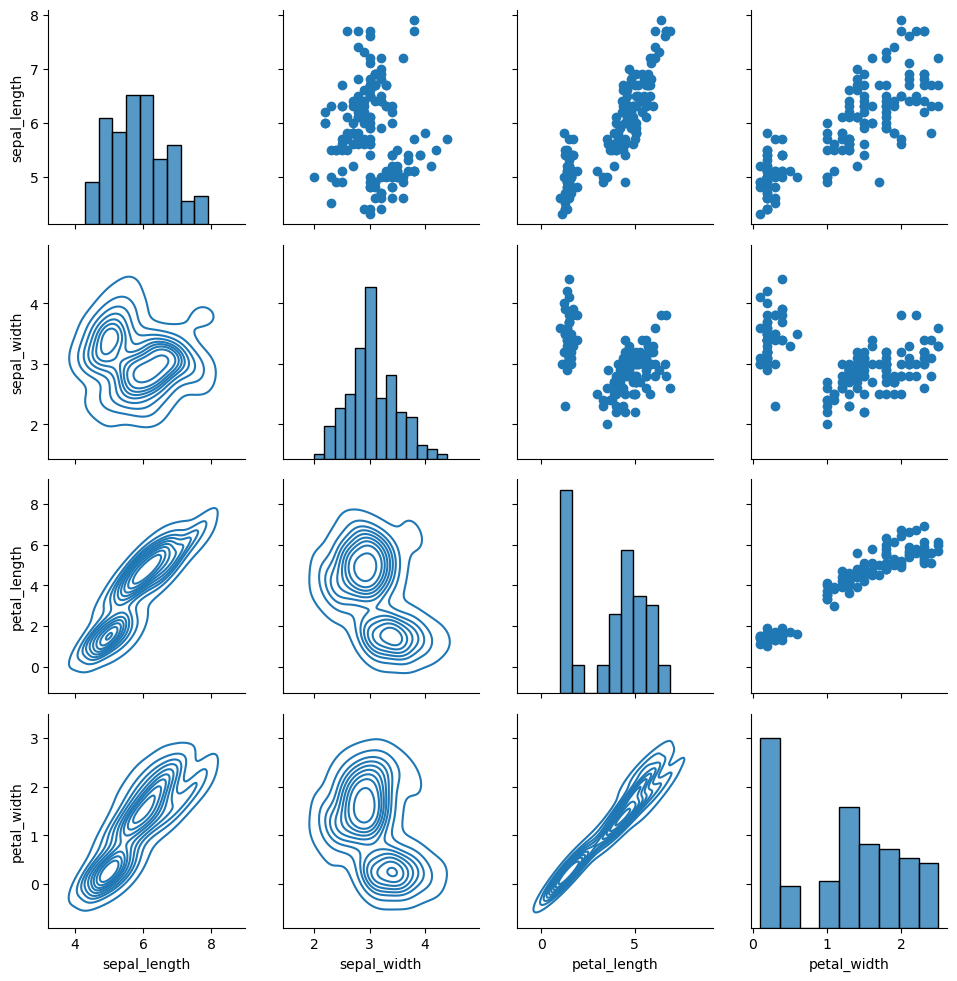

In [86]:
#Pair Grid gives more control over Pair Plots
g = sns.PairGrid(iris)

#maps all plots as scatter plots
#g.map(plt.scatter)

g.map_diag(sns.histplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

In [87]:
#Facet Grid

In [88]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


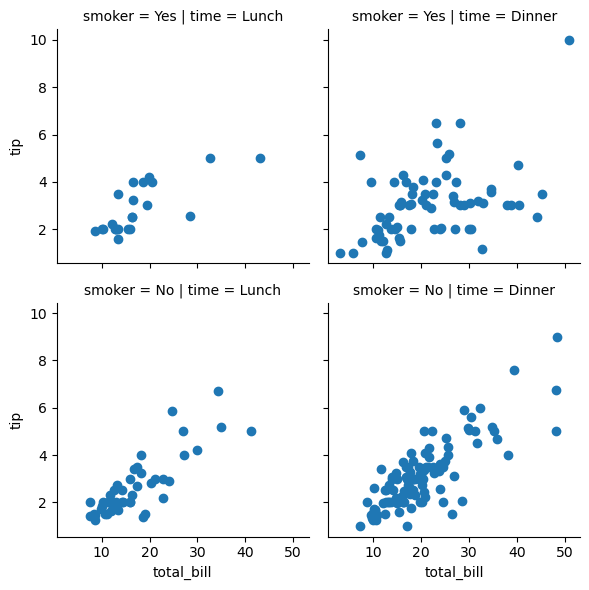

In [94]:
g = sns.FacetGrid(data=tips,col='time',row='smoker')

#One Argument Plot Type
#g.map(sns.histplot,'total_bill')

#Two Argument Plot Type
g.map(plt.scatter,'total_bill','tip')

In [96]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


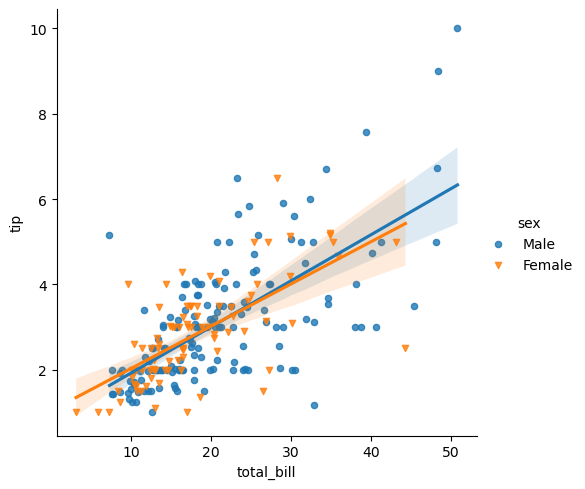

In [102]:
#LM Plot

sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',markers=['o','v'],
          scatter_kws={'s':20})

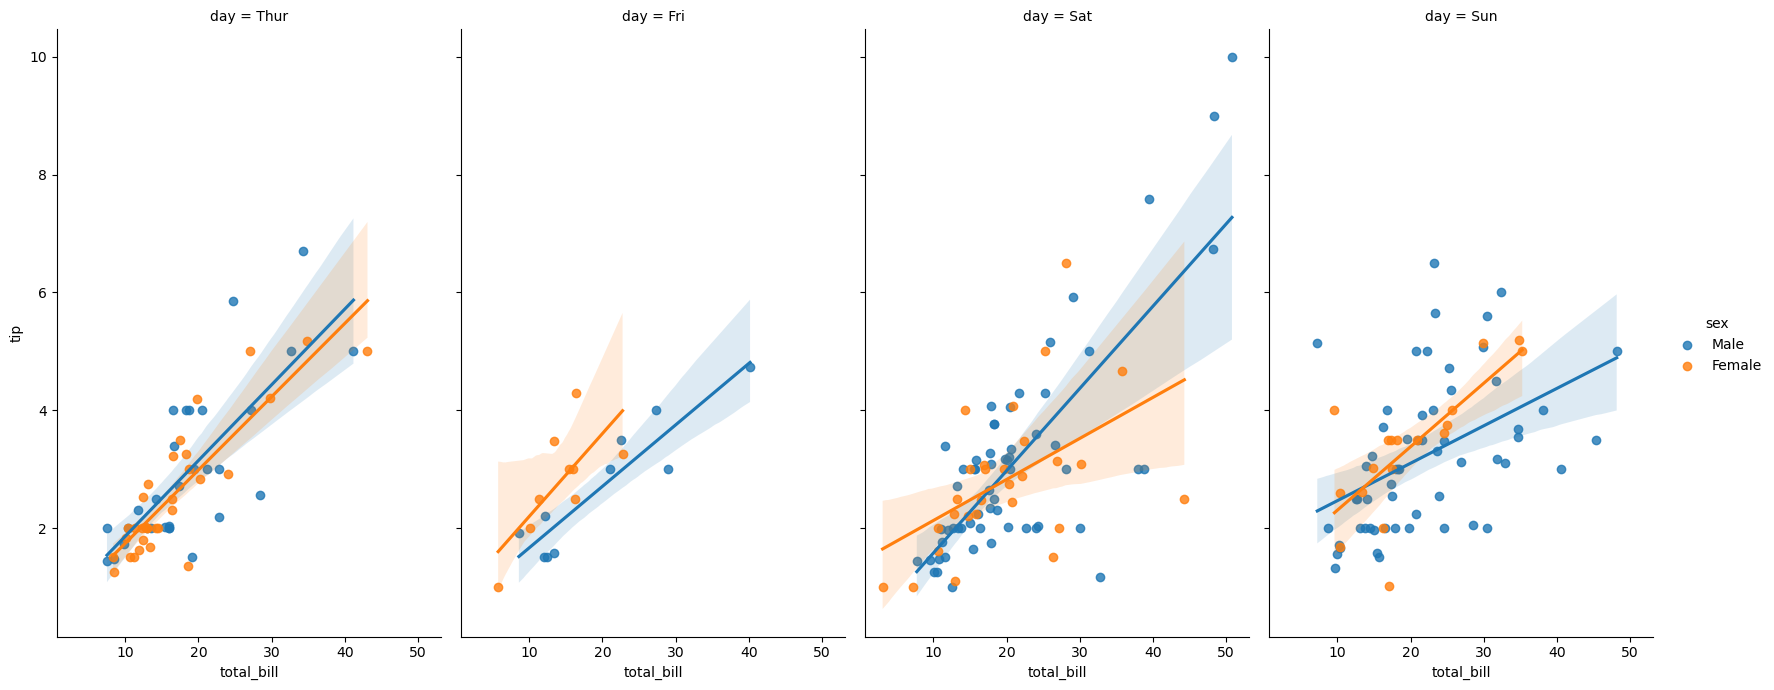

In [111]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',
          aspect=0.6,height=7)

In [113]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='sex', ylabel='count'>

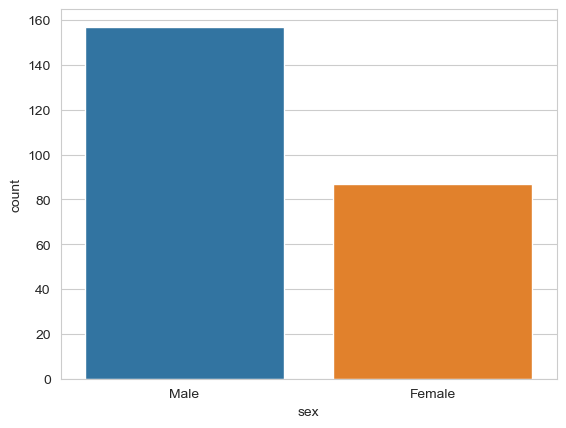

In [118]:
#Set background style

#white = white background
#ticks = ticks at edge of box
#darkgrid = dark grid background
#whitegrid = white grid background

sns.set_style('whitegrid')
sns.countplot(x='sex',data=tips)

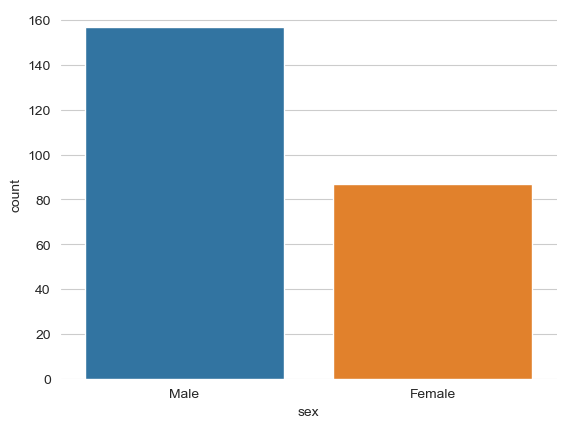

In [120]:
#Remove spines

#top and right are default to true
#to remove bottom and left spines, set those values to true

sns.set_style('whitegrid')
sns.countplot(x='sex',data=tips)
sns.despine(left=True,bottom=True)

<AxesSubplot:xlabel='sex', ylabel='count'>

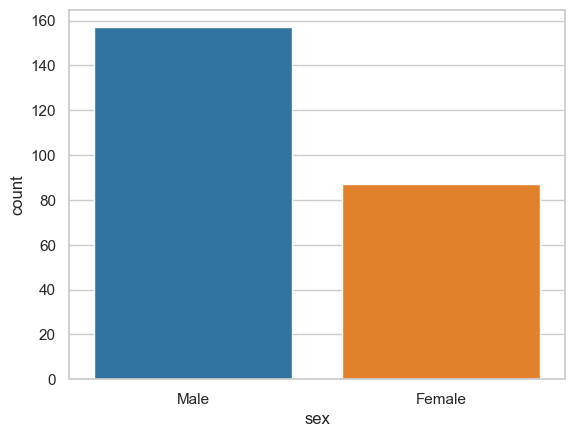

In [127]:
#Change fig sizes and aspect ratios

#Change figure size using matplotlib knowledge
#plt.figure(figsize=(12,3))

#set_context
#notebook is default context
sns.set_context('notebook')
sns.countplot(x='sex',data=tips)


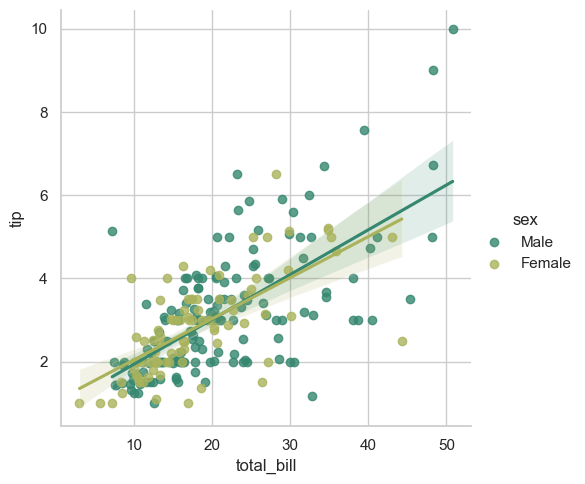

In [131]:
#Palettes and Colors

#can find palettes on matplotlib color map documentation page

sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='gist_earth')